In [1]:
!pip install fcapy
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


In [2]:
import pandas as pd
import numpy as np

/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/ipykernel_1841/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [4]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice

from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

/opt/homebrew/Cellar/jupyterlab/4.1.0/libexec/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data_filled =  pd.read_csv('mammographic_mass.csv')
data_filled

,id,BI-RADS>4,Age>60,Shape>2.5,Margin>1.5,Severity
0,h0,True,True,True,True,True
1,h1,True,False,True,True,True
2,h2,False,False,False,False,False
3,h3,True,False,False,True,True
4,h4,True,True,False,True,True
...,...,...,...,...,...,...
825,h825,False,False,False,False,False
826,h826,False,False,True,True,True
827,h827,False,True,True,True,False
828,h828,True,True,True,True,True


In [6]:
data_filled['sample_id'] = np.arange(0, data_filled.shape[0], 1).astype(str)
data_filled['id'] = data_filled['sample_id'].apply(lambda x: 'h' + x)
data_filled.drop(columns=['sample_id'], inplace=True)
data_filled = data_filled.set_index('id')
data_filled

,BI-RADS>4,Age>60,Shape>2.5,Margin>1.5,Severity
id,,,,,
h0,True,True,True,True,True
h1,True,False,True,True,True
h2,False,False,False,False,False
h3,True,False,False,True,True
h4,True,True,False,True,True
...,...,...,...,...,...
h825,False,False,False,False,False
h826,False,False,True,True,True
h827,False,True,True,True,False


# Beginning of options

In [7]:
y = data_filled['Severity']
data_filled.drop(['Severity'], axis=1, inplace=True)

# Experiments 09.05.24

## DATA SPLITTING

In [8]:
from sklearn.model_selection import train_test_split
X_train_, X_rem, y_train_, y_rem = train_test_split(data_filled,y, train_size=0.6, random_state = 0)
X_valid, X_test_, y_valid, y_test_ = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 0)

In [9]:
y.value_counts()

Severity
False    427
True     403
Name: count, dtype: int64

In [10]:
X_train_.shape

(498, 4)

In [11]:
y_train_.value_counts()

Severity
False    258
True     240
Name: count, dtype: int64

In [12]:
X_valid.shape

(166, 4)

In [13]:
y_valid.value_counts()

Severity
False    87
True     79
Name: count, dtype: int64

In [14]:
X_test_.shape

(166, 4)

In [15]:
y_test_.value_counts()

Severity
True     84
False    82
Name: count, dtype: int64

## BEFORE

## NEXT

In [16]:
K_train_ = FormalContext.from_pandas(X_train_)
K_train_

FormalContext (498 objects, 4 attributes, 968 connections)
    |BI-RADS>4|Age>60|Shape>2.5|Margin>1.5|
h548|        X|      |        X|         X|
h452|         |     X|        X|         X|
h194|        X|     X|        X|         X|
h542|         |      |         |          |
h132|         |      |         |          |
h233|         |     X|        X|         X|
h173|        X|      |         |         X|
h178|         |      |         |          |
h313|        X|      |        X|         X|
h315|         |     X|        X|         X|
...........................................
...........................................
h277|         |      |         |          |
h723|         |      |         |          |
h9  |         |      |        X|         X|
h359|         |      |        X|         X|
h707|         |      |         |          |
h763|         |      |         |         X|
h192|        X|     X|        X|         X|
h629|         |     X|        X|         X|
h559|         |  

In [17]:
L_ = ConceptLattice.from_context(K_train_, algo='Sofia', is_monotone= True)
len(L_)

16

In [18]:
for c in L_:
    print(c.intent)

()
('BI-RADS>4',)
('Age>60',)
('BI-RADS>4', 'Age>60')
('Shape>2.5',)
('BI-RADS>4', 'Shape>2.5')
('Margin>1.5',)
('BI-RADS>4', 'Margin>1.5')
('Shape>2.5', 'Margin>1.5')
('BI-RADS>4', 'Shape>2.5', 'Margin>1.5')
('Age>60', 'Shape>2.5')
('BI-RADS>4', 'Age>60', 'Shape>2.5')
('Age>60', 'Margin>1.5')
('BI-RADS>4', 'Age>60', 'Margin>1.5')
('Age>60', 'Shape>2.5', 'Margin>1.5')
('BI-RADS>4', 'Age>60', 'Shape>2.5', 'Margin>1.5')


## Experiment with all concepts

In [19]:
L_ind = []
for c in L_:
    L_ind.append(L_.index(c))
#L_ind = L_ind[:3]
print(L_ind)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [20]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
epochs_list = []
cn = nl.ConceptNetwork.from_lattice(L_, L_ind, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(50):
    k = 100
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred = pred_all[1]
    pred_train = pred_train_all[1]

    print('score train:', f1_score(y_train_, pred_train))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
print(max(f1_list))

Epoch  100
score train: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score test: 0.0
Epoch  700
score train: 0.0
score test: 0.0
Epoch  800
score train: 0.0
score test: 0.0
Epoch  900
score train: 0.0
score test: 0.0
Epoch  1000
score train: 0.0
score test: 0.0
Epoch  1100
score train: 0.0
score test: 0.0
Epoch  1200
score train: 0.5502958579881657
score test: 0.5172413793103449
Epoch  1300
score train: 0.7536945812807881
score test: 0.7837837837837838
Epoch  1400
score train: 0.7828162291169452
score test: 0.7785234899328859
Epoch  1500
score train: 0.8373101952277657
score test: 0.8098159509202454
Epoch  1600
score train: 0.8423326133909287
score test: 0.8170731707317073
Epoch  1700
score train: 0.8423326133909287
score test: 0.8170731707317073
Epoch  1800
score train: 0.8412017167381974
score test: 0.807228

([<matplotlib.axis.YTick at 0x28f35e9f0>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95')])

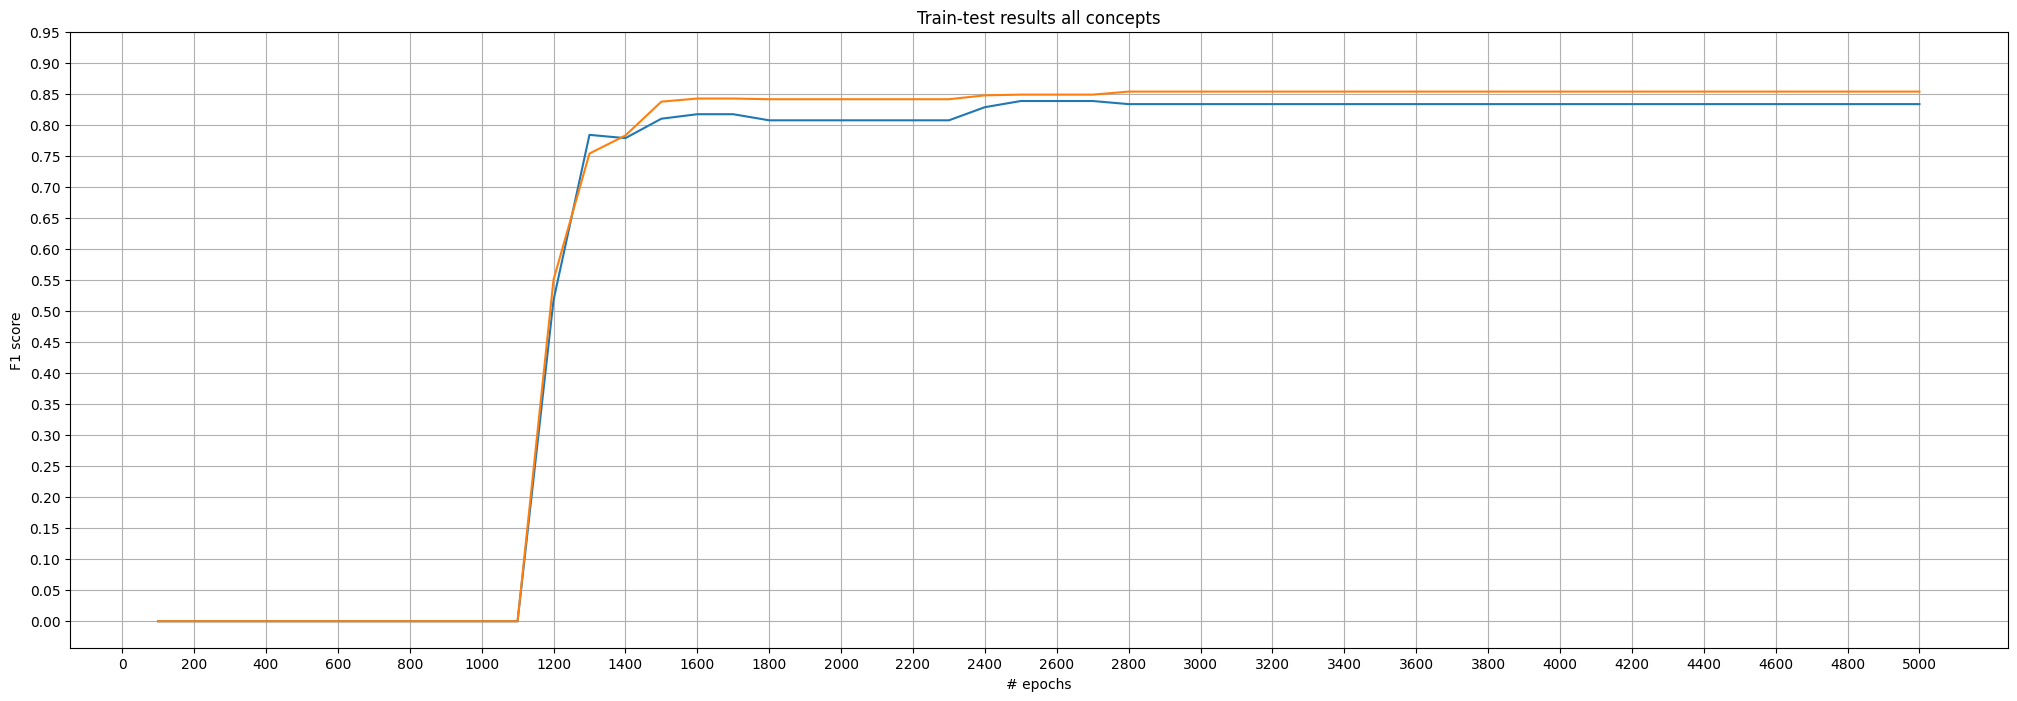

In [21]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)

plt.title('Train-test results all concepts')
plt.xlabel("# epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(0, 5200, 200))
plt.yticks(np.arange(0, 1, 0.05))

In [22]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

In [23]:
edge_weights = cn.edge_weights_from_network()

/opt/homebrew/Cellar/jupyterlab/4.1.0/libexec/lib/python3.12/site-packages/sparselinear/sparselinear.py:301: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:620.)
  weight = torch.sparse.FloatTensor(self.indices, self.weights, (self.out_features, self.in_features))


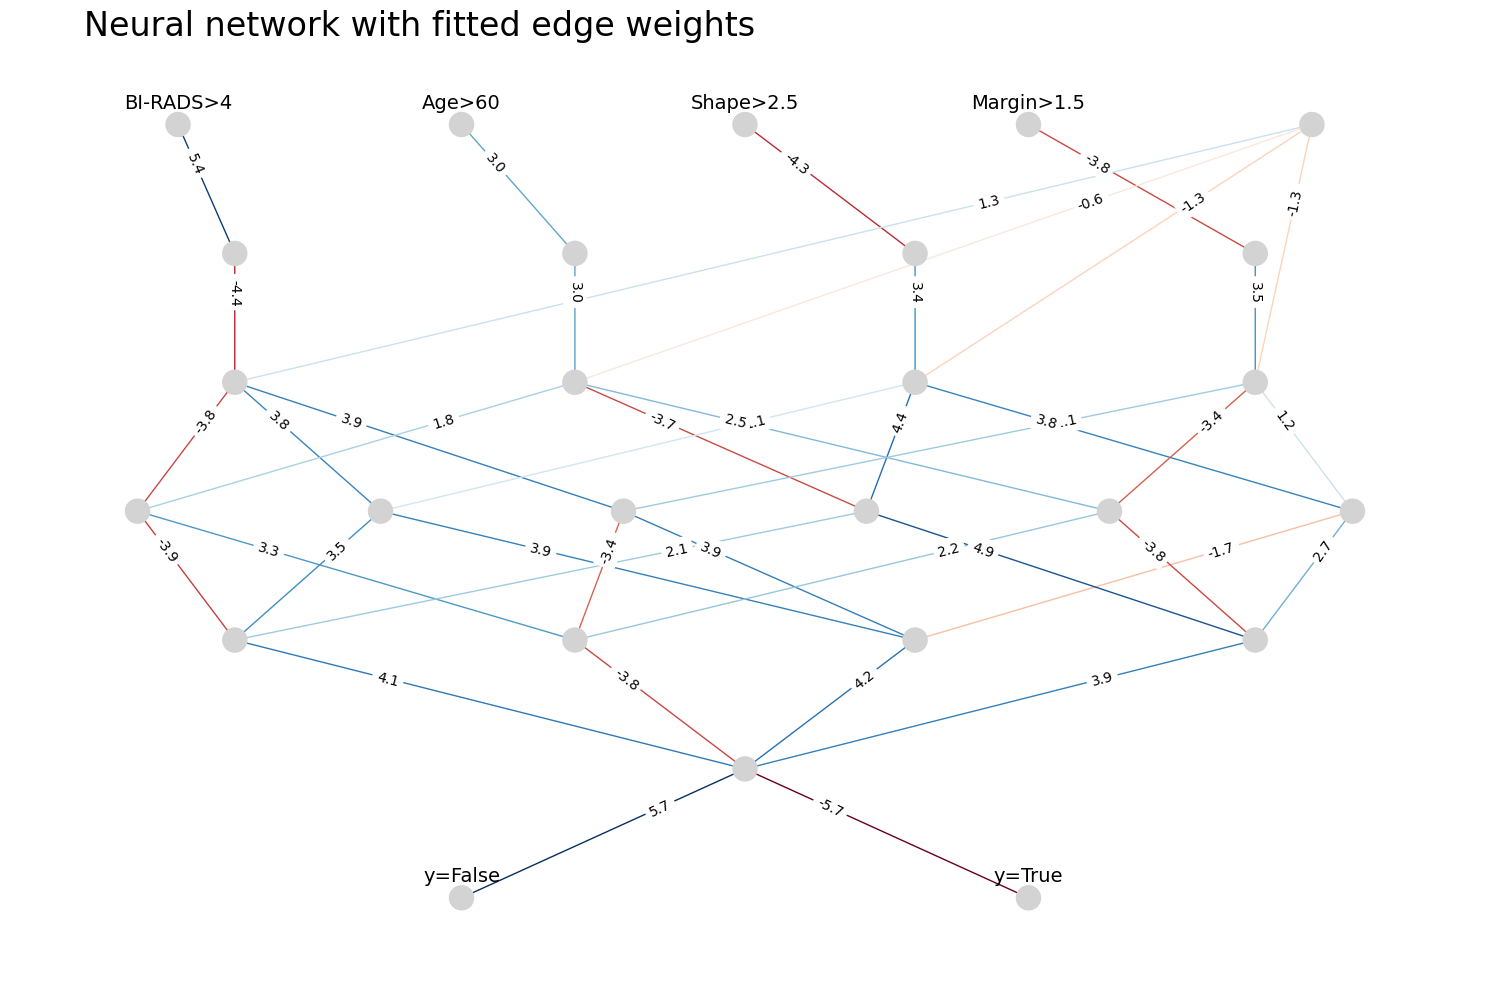

In [24]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,10))

vis.draw_poset(
    cn.poset, ax=ax, 
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_network.png')
plt.show()

## End of experiments with all concepts

### Purity function

In [25]:
def purity(concept, y_train):
    count_pos = 0
    count_neg = 0
    positive = True
    for obj in concept.extent:
        if y_train[obj] == True:
            count_pos+= 1
        else:
            count_neg+= 1
            
    if count_pos < count_neg:
        positive = False
    if len(concept.extent)!= 0:
        return count_pos, count_neg, max(count_pos, count_neg)/ len(concept.extent), positive
    else:
        return 0,0, 0, False

### Object coverage function

In [26]:
def obj_coverage(concept, y_train):
    return round(len(concept.extent)/len(y_train),2)

### Concept properties calculation

In [27]:
L_prop = []
conc_prop = []
pos = 0 
neg = 0
pur  = 0
pur_list = []
cover = 0
for c in L_:
    conc_prop.append(c) # 0-s element is concepts itself
    pos, neg, pur, positive = purity(c, y_train_)
    pur_list.append(pos)
    pur_list.append(neg)
    pur_list.append(pur)
    pur_list.append(positive)
    cover = obj_coverage(c, y_train_)
    conc_prop.append(pur_list) #  1-s element is purity itself
    conc_prop.append(cover)  #  2-s element is coverage itself
    L_prop.append(conc_prop)
    conc_prop = []
    pur_list = []
    pur = 0
    cover = 0 

In [28]:
pur_list = []
cover_list = []
for c in L_prop:
    pur_list.append(c[1][2]) # just purities
    cover_list.append(c[2])  #just object coverages

In [29]:
print('min-max purity:', min(pur_list), max(pur_list)) # this particular train-test-valid
print('min-max coverage:', min(cover_list), max(cover_list)) # (object coverage)

min-max purity: 0 0.91005291005291
min-max coverage: 0.0 0.72


In [30]:
for c in L_prop:
    print(round(c[1][2],2),round(c[2],2)) # for each concept print its purity and object coverage

0 0.0
0.91 0.38
0.73 0.4
0.77 0.55
0.74 0.56
0.75 0.6
0.72 0.61
0.72 0.63
0.7 0.65
0.7 0.65
0.68 0.66
0.69 0.68
0.66 0.69
0.66 0.69
0.65 0.71
0.65 0.72


In [74]:
count_pur_one_sided = {} # dictionary of number of concepts in  the purity interval [key,) (from this value and above)
pur_conc_one_sided = {} # dictionary of concept lists in  the purity interval [key, )
pur_conc_all_one_sided ={} # dictionary of all concepts (with all properties) belonging to particular intervals
cov_conc_one_sided = {} # dictionart of all concepts' coverages belonging to particular intervals

for i in np.arange(0, 1, 0.05):
    count_pur_one_sided[round(i,2)] = 0
    pur_conc_one_sided[round(i,2)] = []
    pur_conc_all_one_sided[round(i,2)] = []
    cov_conc_one_sided[round(i,2)] = []
    
   # print(round(i,2))
    for c in L_prop:
        if (round(c[1][2],2)>= round(i,2)): # purity above this threshold 
            print( round(i,2))
            print(c[1][2])
            count_pur_one_sided[round(i,2)]+=1 # how many in this interval
            pur_conc_one_sided[round(i,2)].append(c[0]) # what concepts are in this interval
            pur_conc_all_one_sided[round(i,2)].append(c) # add everything connected to this concepts
            cov_conc_one_sided[round(i,2)].append(c[2]) # add object coverage connected to this concepts
            
# print(count_pur)
# check_1 = 0
# check_2 = 0
# for key in count_pur:
#     check_1+=count_pur[key]
#     check_2+=len(pur_conc[key])
# print(check_1, check_2)

0.0
0
0.0
0.91005291005291
0.0
0.7309644670050761
0.0
0.7700729927007299
0.0
0.740072202166065
0.0
0.7483221476510067
0.0
0.7180327868852459
0.0
0.717948717948718
0.0
0.6956521739130435
0.0
0.6993865030674846
0.0
0.6848484848484848
0.0
0.6863905325443787
0.0
0.6637426900584795
0.0
0.6647398843930635
0.0
0.6507042253521127
0.0
0.6526610644257703
0.05
0.91005291005291
0.05
0.7309644670050761
0.05
0.7700729927007299
0.05
0.740072202166065
0.05
0.7483221476510067
0.05
0.7180327868852459
0.05
0.717948717948718
0.05
0.6956521739130435
0.05
0.6993865030674846
0.05
0.6848484848484848
0.05
0.6863905325443787
0.05
0.6637426900584795
0.05
0.6647398843930635
0.05
0.6507042253521127
0.05
0.6526610644257703
0.1
0.91005291005291
0.1
0.7309644670050761
0.1
0.7700729927007299
0.1
0.740072202166065
0.1
0.7483221476510067
0.1
0.7180327868852459
0.1
0.717948717948718
0.1
0.6956521739130435
0.1
0.6993865030674846
0.1
0.6848484848484848
0.1
0.6863905325443787
0.1
0.6637426900584795
0.1
0.6647398843930635
0.

In [75]:
print(count_pur_one_sided)


{0.0: 16, 0.05: 15, 0.1: 15, 0.15: 15, 0.2: 15, 0.25: 15, 0.3: 15, 0.35: 15, 0.4: 15, 0.45: 15, 0.5: 15, 0.55: 15, 0.6: 15, 0.65: 15, 0.7: 9, 0.75: 3, 0.8: 1, 0.85: 1, 0.9: 1, 0.95: 0}


In [76]:
for key in pur_conc_all_one_sided:
    print(key, count_pur_one_sided[key]) # number of concept with purity above this 
    if count_pur_one_sided[key] == 0:
        print('0')
    else:
        print(max(cov_conc_one_sided[key]))

0.0 16
0.72
0.05 15
0.72
0.1 15
0.72
0.15 15
0.72
0.2 15
0.72
0.25 15
0.72
0.3 15
0.72
0.35 15
0.72
0.4 15
0.72
0.45 15
0.72
0.5 15
0.72
0.55 15
0.72
0.6 15
0.72
0.65 15
0.72
0.7 9
0.65
0.75 3
0.6
0.8 1
0.38
0.85 1
0.38
0.9 1
0.38
0.95 0
0


In [77]:
for c in pur_conc_one_sided[0.8]:
    print(L_.index(c))

1


# Concept analysis

In [78]:
pur_07 = 0.7

In [79]:
table_mm_07 = pd.DataFrame(columns = ['intent',
                                 'purity', 
                                 'object coverage',
                                 '# positive objects',
                                 '# negative objects',
                                 '# more positive or negative?'

                                ])



print('purity >= 0.7')
i = 0
for conc in pur_conc_all_one_sided[pur_07]:
    print('positive objects', conc[1][0])
    print('negative objects', conc[1][1])
    print('purity', round(conc[1][2],2))
    print(conc[2])
    print(conc[1][3])
    print(conc[0].intent)


    table_mm_07.loc[i] = [conc[0].intent, round(conc[1][2],2), conc[2],  conc[1][0], conc[1][1], conc[1][3]]
    i+=1

table_mm_07.to_csv('table_mm_07.csv')
table_mm_07

purity >= 0.7
positive objects 172
negative objects 17
purity 0.91
0.38
True
('BI-RADS>4',)
positive objects 144
negative objects 53
purity 0.73
0.4
True
('Age>60',)
positive objects 211
negative objects 63
purity 0.77
0.55
True
('BI-RADS>4', 'Age>60')
positive objects 205
negative objects 72
purity 0.74
0.56
True
('Shape>2.5',)
positive objects 223
negative objects 75
purity 0.75
0.6
True
('BI-RADS>4', 'Shape>2.5')
positive objects 219
negative objects 86
purity 0.72
0.61
True
('Margin>1.5',)
positive objects 224
negative objects 88
purity 0.72
0.63
True
('BI-RADS>4', 'Margin>1.5')
positive objects 224
negative objects 98
purity 0.7
0.65
True
('Shape>2.5', 'Margin>1.5')
positive objects 228
negative objects 98
purity 0.7
0.65
True
('BI-RADS>4', 'Shape>2.5', 'Margin>1.5')


,intent,purity,object coverage,# positive objects,# negative objects,# more positive or negative?
0,"(BI-RADS>4,)",0.91,0.38,172,17,True
1,"(Age>60,)",0.73,0.40,144,53,True
2,"(BI-RADS>4, Age>60)",0.77,0.55,211,63,True
3,"(Shape>2.5,)",0.74,0.56,205,72,True
4,"(BI-RADS>4, Shape>2.5)",0.75,0.60,223,75,True
5,"(Margin>1.5,)",0.72,0.61,219,86,True
6,"(BI-RADS>4, Margin>1.5)",0.72,0.63,224,88,True
7,"(Shape>2.5, Margin>1.5)",0.70,0.65,224,98,True
8,"(BI-RADS>4, Shape>2.5, Margin>1.5)",0.70,0.65,228,98,True


In [90]:
pur_065 = 0.65
table_mm_065 = pd.DataFrame(columns = ['intent',
                                 'purity', 
                                 'object coverage',
                                 '# positive objects',
                                 '# negative objects',
                                 '# more positive or negative?'

                                ])



print('purity >= 0.65')
i = 0
for conc in pur_conc_all_one_sided[pur_065]:
    print('positive objects', conc[1][0])
    print('negative objects', conc[1][1])
    print('purity', round(conc[1][2],2))
    print(conc[2])
    print(conc[1][3])
    print(conc[0].intent)


    table_mm_065[len(table_mm_065)] = [conc[0].intent, round(conc[1][2],2), conc[2],  conc[1][0], conc[1][1], conc[1][3]]
    i+=1

table_mm_065.to_csv('table_mm_065.csv')
table_mm_065

purity >= 0.65
positive objects 172
negative objects 17
purity 0.91
0.38
True
('BI-RADS>4',)
positive objects 144
negative objects 53
purity 0.73
0.4
True
('Age>60',)
positive objects 211
negative objects 63
purity 0.77
0.55
True
('BI-RADS>4', 'Age>60')
positive objects 205
negative objects 72
purity 0.74
0.56
True
('Shape>2.5',)
positive objects 223
negative objects 75
purity 0.75
0.6
True
('BI-RADS>4', 'Shape>2.5')
positive objects 219
negative objects 86
purity 0.72
0.61
True
('Margin>1.5',)
positive objects 224
negative objects 88
purity 0.72
0.63
True
('BI-RADS>4', 'Margin>1.5')
positive objects 224
negative objects 98
purity 0.7
0.65
True
('Shape>2.5', 'Margin>1.5')
positive objects 228
negative objects 98
purity 0.7
0.65
True
('BI-RADS>4', 'Shape>2.5', 'Margin>1.5')
positive objects 226
negative objects 104
purity 0.68
0.66
True
('Age>60', 'Shape>2.5')
positive objects 232
negative objects 106
purity 0.69
0.68
True
('BI-RADS>4', 'Age>60', 'Shape>2.5')
positive objects 227
negati

,intent,purity,object coverage,# positive objects,# negative objects,# more positive or negative?,0,6
0,NaN,NaN,NaN,NaN,NaN,NaN,"(BI-RADS>4,)","(BI-RADS>4, Age>60, Shape>2.5, Margin>1.5)"
1,NaN,NaN,NaN,NaN,NaN,NaN,0.91,0.65
2,NaN,NaN,NaN,NaN,NaN,NaN,0.38,0.72
3,NaN,NaN,NaN,NaN,NaN,NaN,172,233
4,NaN,NaN,NaN,NaN,NaN,NaN,17,124
5,NaN,NaN,NaN,NaN,NaN,NaN,True,True


In [93]:
pur_065= 0.65

print('purity >= 0.65')
table_065_07_mm = pd.DataFrame(columns = ['intent',
                                 'purity', 
                                 'object coverage',
                                 '# positive objects',
                                 '# negative objects',
                                 '# more positive or negative?'

                                ])
for conc in pur_conc_all_one_sided[pur_065]:
    if round(conc[1][2],2) < 0.7:
        table_065_07_mm.loc[len(table_065_07_mm)] = [conc[0].intent, round(conc[1][2],2), conc[2],  conc[1][0], conc[1][1], conc[1][3]]
        print('positive objects', conc[1][0])
        print('negative objects', conc[1][1])
        print('purity', round(conc[1][2],2))
        print(conc[2])
        print(conc[1][3])
        print(conc[0].intent)
      
table_065_07_mm.to_csv('table_065_07_mm.csv')
table_065_07_mm

purity >= 0.65
positive objects 226
negative objects 104
purity 0.68
0.66
True
('Age>60', 'Shape>2.5')
positive objects 232
negative objects 106
purity 0.69
0.68
True
('BI-RADS>4', 'Age>60', 'Shape>2.5')
positive objects 227
negative objects 115
purity 0.66
0.69
True
('Age>60', 'Margin>1.5')
positive objects 230
negative objects 116
purity 0.66
0.69
True
('BI-RADS>4', 'Age>60', 'Margin>1.5')
positive objects 231
negative objects 124
purity 0.65
0.71
True
('Age>60', 'Shape>2.5', 'Margin>1.5')
positive objects 233
negative objects 124
purity 0.65
0.72
True
('BI-RADS>4', 'Age>60', 'Shape>2.5', 'Margin>1.5')


,intent,purity,object coverage,# positive objects,# negative objects,# more positive or negative?
0,"(Age>60, Shape>2.5)",0.68,0.66,226,104,True
1,"(BI-RADS>4, Age>60, Shape>2.5)",0.69,0.68,232,106,True
2,"(Age>60, Margin>1.5)",0.66,0.69,227,115,True
3,"(BI-RADS>4, Age>60, Margin>1.5)",0.66,0.69,230,116,True
4,"(Age>60, Shape>2.5, Margin>1.5)",0.65,0.71,231,124,True
5,"(BI-RADS>4, Age>60, Shape>2.5, Margin>1.5)",0.65,0.72,233,124,True


## 2 concepts

### 1. Check for purity above 0.7

In [82]:
pur_07 = 0.7
L_ind_07 = []
for conc in pur_conc_all_one_sided[pur_07]:
    L_ind_07.append(L_.index(conc[0]))
print(L_ind_07)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [83]:
len(L_ind_07)

9

### 2. Check for purity above 0.65

In [84]:
pur_065 = 0.65
L_ind_065 = []
for conc in pur_conc_all_one_sided[pur_065]:
    L_ind_065.append(L_.index(conc[0]))
print(L_ind_065)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


### 3. Let's try all concepts from the interval >=0.7

In [85]:
union_coverage_obj = set((pur_conc_all_one_sided[pur_07][0][0].extent))
for conc in pur_conc_all_one_sided[pur_07]:
    print(conc[2])
    union_coverage_obj = union_coverage_obj.union(set(conc[0].extent))
print(round(len(union_coverage_obj)/len(y_train_),2))

0.38
0.4
0.55
0.56
0.6
0.61
0.63
0.65
0.65
0.72


In [86]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
f1_list_valid = []
epochs_list = []

res_07_all_mm = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn = nl.ConceptNetwork.from_lattice(L_, L_ind_07, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(200):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred_val_all = cn.predict(X_valid)
    pred_valid = pred_val_all[1]
    pred = pred_all[1]
    pred_train = pred_train_all[1]
    

    print('score train:', f1_score(y_train_, pred_train))
    print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
    f1_list_valid.append(f1_score(y_valid, pred_valid))
    res_07_all_mm.loc[len(res_07_all_mm)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

    


Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  650
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  700
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  750
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  800
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  850
score train: 0.0
score val: 0.0
score test: 0.

In [94]:
res_07_all_mm.to_csv('mammographic_mass_07_all.csv')

([<matplotlib.axis.YTick at 0x296f8c2c0>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

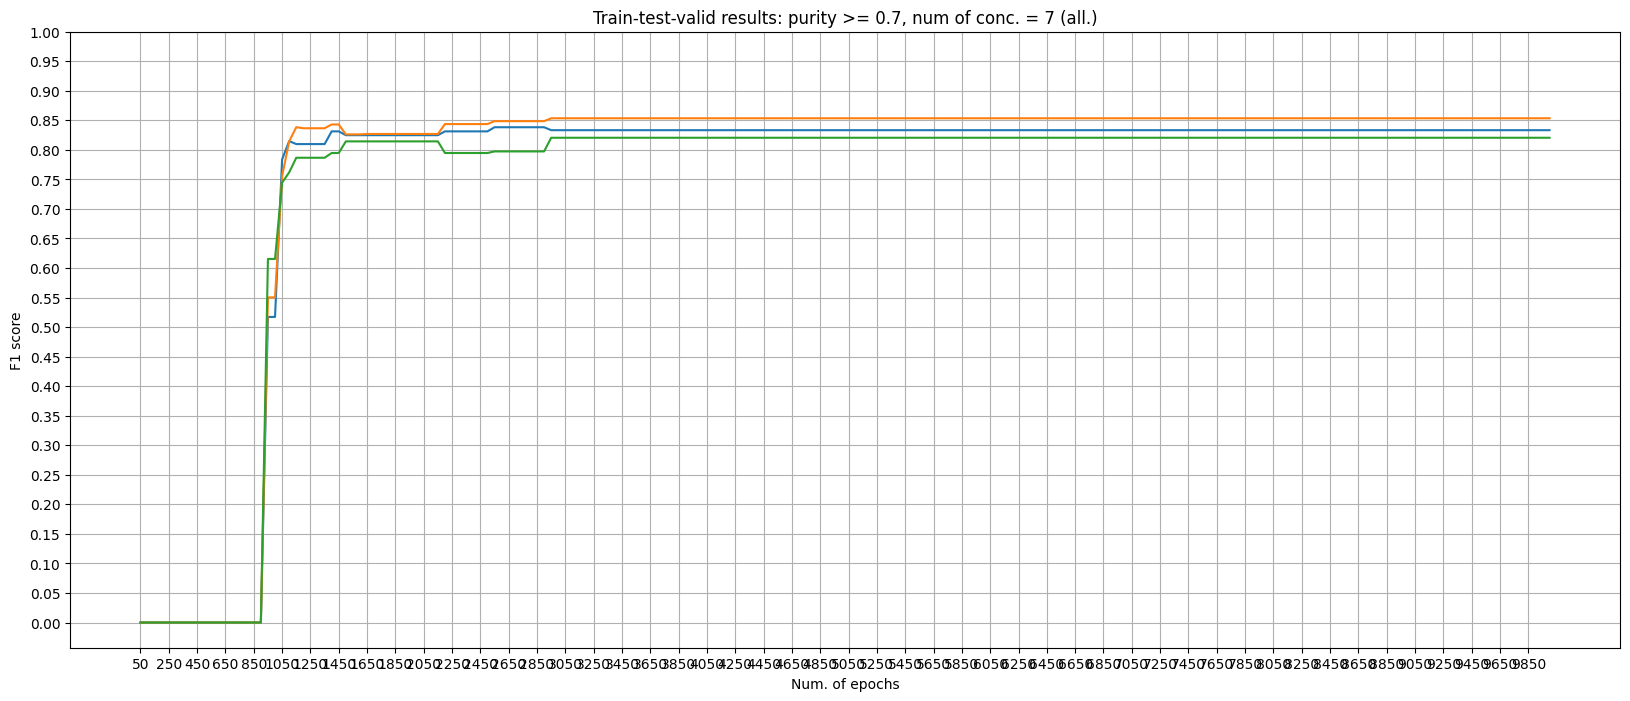

In [95]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)
plt.plot(epochs_list, f1_list_valid)
plt.title('Train-test-valid results: purity >= 0.7, num of conc. = 7 (all.)')
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 10050, 200))
plt.yticks(np.arange(0, 1.05, 0.05))

In [103]:
res_07_all_mm[res_07_all_mm['epoch']==2050]

,epoch,F1_score_train,F1_score_val,F1_score_test
40,2050.0,0.826923,0.814371,0.824859


In [117]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
#f1_list_train = []
#f1_list_valid = []
#epochs_list = []

#res_90_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])
for i in range (0,100):
    print(i)
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_, sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_2, sorted(set(y_train_))) 
   # L_ind_3
    cn = nl.ConceptNetwork.from_lattice(L_, L_ind_065, sorted(set(y_train_))) 
    #L_ind_used_prior[10]
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[6], sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[23], sorted(set(y_train_)))
    #cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[1], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
    for i in range(42):
        k = 50
        #print('Epoch ', k*(i+1))
        epochs_list.append(k*(i+1))
        if i == 0:
            cn.fit(X_train_, y_train_, k)
        else:
            cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
   # pred_train_all = cn.predict(X_train_)
    #pred_val_all = cn.predict(X_valid)
    #pred_valid = pred_val_all[1]
    pred = pred_all[1]
    #pred_train = pred_train_all[1]
    

   # print('score train:', f1_score(y_train_, pred_train))
    #print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    #f1_list_train.append(f1_score(y_train_, pred_train))
    #f1_list_valid.append(f1_score(y_valid, pred_valid))
    #res_90_all.loc[len(res_90_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

print('Test F1 score', sum(f1_list)/100)


0
score test: 0.8098159509202454
1
score test: 0.8098159509202454
2
score test: 0.8313253012048193
3
score test: 0.8072289156626506
4
score test: 0.8
5
score test: 0.8383233532934131
6
score test: 0.8383233532934131
7
score test: 0.8023255813953488
8
score test: 0.8098159509202454
9
score test: 0.8383233532934131
10
score test: 0.8
11
score test: 0.8248587570621468
12
score test: 0.8228571428571428
13
score test: 0.8323699421965318
14
score test: 0.7916666666666666
15
score test: 0.8323699421965318
16
score test: 0.8313253012048193
17
score test: 0.8313253012048193
18
score test: 0.819672131147541
19
score test: 0.8045977011494253
20
score test: 0.8023255813953488
21
score test: 0.8170731707317073
22
score test: 0.8313253012048193
23
score test: 0.8098159509202454
24
score test: 0.8098159509202454
25
score test: 0.8383233532934131
26
score test: 0.8313253012048193
27
score test: 0.8045977011494253
28
score test: 0.8098159509202454
29
score test: 0.8098159509202454
30
score test: 0.8098

### 2. Let's try all concepts from this interval: purity > 0.65

#### 1) They cover:

In [57]:
pur_065 = 0.65

In [105]:
union_coverage_obj = set((pur_conc_all_one_sided[pur_065][0][0].extent))
for conc in pur_conc_all_one_sided[pur_065]:
    print(conc[2])
    union_coverage_obj = union_coverage_obj.union(set(conc[0].extent))
print(round(len(union_coverage_obj)/len(y_train_),2))
    

0.38
0.4
0.55
0.56
0.6
0.61
0.63
0.65
0.65
0.66
0.68
0.69
0.69
0.71
0.72
0.72


#### Checking the performance:


In [106]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
f1_list_valid = []
epochs_list = []

res_065_all_mm = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn = nl.ConceptNetwork.from_lattice(L_, L_ind_065, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(200):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred_val_all = cn.predict(X_valid)
    pred_valid = pred_val_all[1]
    pred = pred_all[1]
    pred_train = pred_train_all[1]
    

    print('score train:', f1_score(y_train_, pred_train))
    print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
    f1_list_valid.append(f1_score(y_valid, pred_valid))
    res_065_all_mm.loc[len(res_065_all_mm)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

    


Epoch  50
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672
Epoch  100
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672
Epoch  150
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  650
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  700
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  750
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  800
score tra

In [107]:
res_07_all_mm.to_csv('res_07_all_mm.csv')
res_065_all_mm.to_csv('res_065_all_mm.csv')

In [115]:
res_065_all_mm[res_065_all_mm['epoch']==2050]

,epoch,F1_score_train,F1_score_val,F1_score_test
40,2050.0,0.821012,0.807229,0.804598


([<matplotlib.axis.YTick at 0x108249f40>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

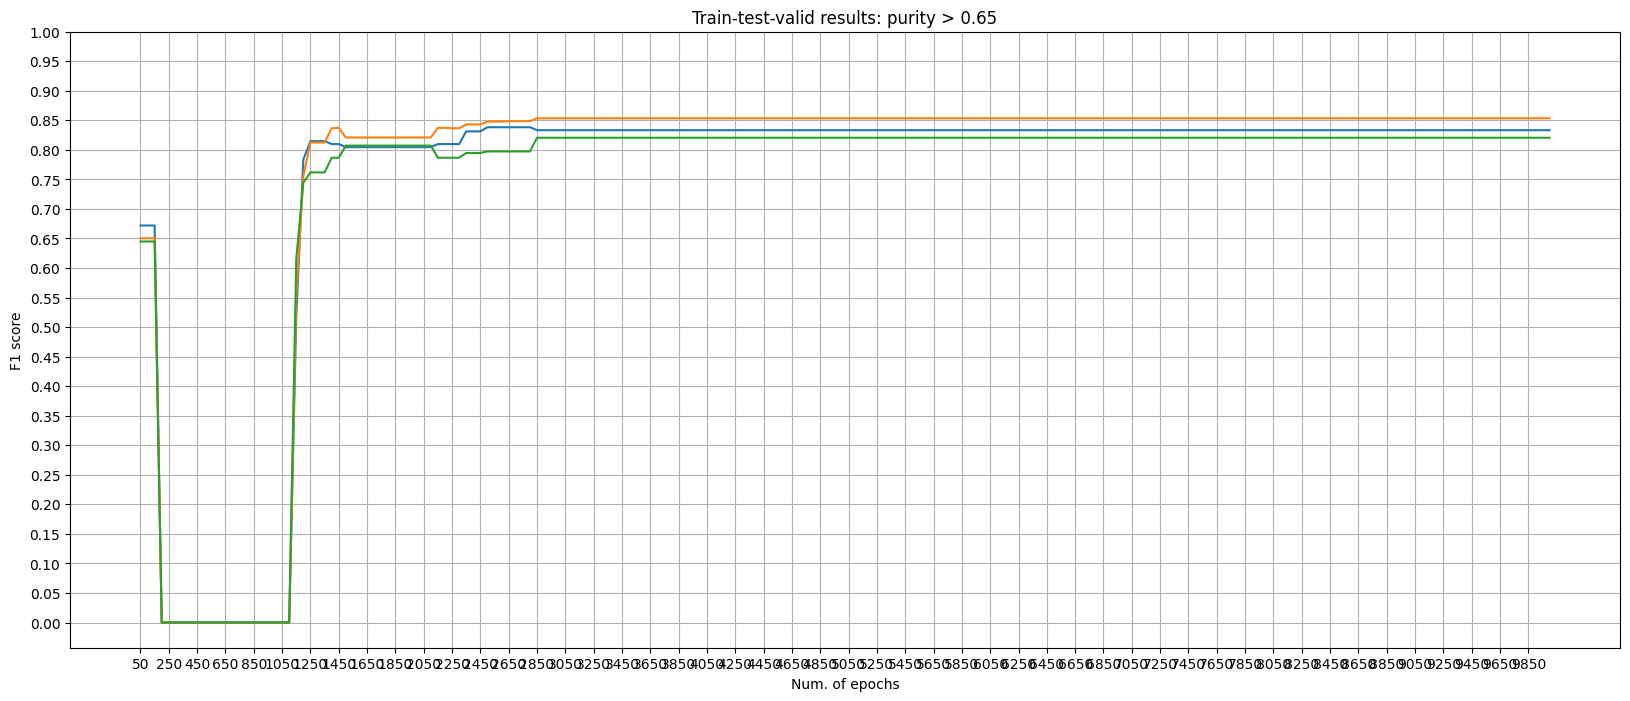

In [109]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)
plt.plot(epochs_list, f1_list_valid)
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 10050, 200))
plt.yticks(np.arange(0, 1.05, 0.05))

#### Choosing 2 concepts with maximal union coverage with purity above 0.7

In [124]:
n = 2
pur_ = 0.7
sorted_cov = sorted(cov_conc_one_sided[pur_])

t = count_pur_one_sided[pur_]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_]:
        if c[2] == sorted_cov[-i]:
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            print(cover_un)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen = conc
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen)
    list_param.append(conc_prior)
    list_param.append(cover_un)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

0.65
0.71
0.72
0.65
0.71
0.72
0.69
0.63
0.69
0.69
0.68
0.6
0.66
0.68
0.68
0.69
0.72
0.55
0.66
0.68
0.69
0.69
0.71
0.72
0.55
0.6
0.63
0.65
{1: [0.72, [8, 3]], 2: [0.72, [8, 3]], 3: [0.69, [7, 2]], 4: [0.69, [6, 3]], 5: [0.68, [5, 2]], 6: [0.68, [4, 3]], 7: [0.72, [3, 8]], 8: [0.72, [2, 9]], 9: [0.65, [1, 8]]}


## 2 concepts with purity > 0.65

In [285]:
n = 2
pur_3 = 0.65
sorted_cov = sorted(cov_conc_one_sided[pur_3])

t = count_pur_one_sided[pur_3]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_3]:
        if c[2] == sorted_cov[-i]:
            #print('lala', sorted_cov[-i])
            #print('fc',L_.index(first_c[0]))
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_3]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen = conc
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen)
    list_param.append(conc_prior)
    list_param.append(cover_un)
    conc_list_[i] = list_param
    #print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

{1: [0.72, [8, 3]], 2: [0.72, [8, 3]], 3: [0.69, [7, 2]], 4: [0.69, [6, 3]], 5: [0.68, [5, 2]], 6: [0.68, [4, 3]], 7: [0.72, [3, 8]], 8: [0.72, [2, 9]], 9: [0.65, [1, 8]]}


In [427]:
import neural_lib58 as nl
import matplotlib as plt
coverage_i = full_list_ind[12][0]
f1_list_ = []
f1_list_train_ = []
f1_list_valid_ = []
epochs_list_ = []

res_65_12_3_mm= pd.DataFrame(columns = ['cov', 'epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[12], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(200):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list_.append(k*(i+1))
    if i == 0:
        cn_.fit(X_train_, y_train_, k)
    else:
        cn_.fit_2(X_train_, y_train_, k)
    pred_all_ = cn_.predict(X_test_)
    pred_train_all_ = cn_.predict(X_train_)
    pred_val_all_ = cn_.predict(X_valid)
    pred_valid_ = pred_val_all_[1]
    pred_ = pred_all_[1]
    pred_train_ = pred_train_all_[1]
    

    print('score train:', f1_score(y_train_, pred_train_))
    print('score val:', f1_score(y_valid, pred_valid_))
    print('score test:', f1_score(y_test_, pred_))
    f1_list_.append(f1_score(y_test_, pred_))
    f1_list_train_.append(f1_score(y_train_, pred_train_))
    f1_list_valid_.append(f1_score(y_valid, pred_valid_))
    res_65_12_3_mm.loc[len(res_65_12_3_mm)] = [coverage_i, k*(i+1), f1_score(y_train_, pred_train_), f1_score(y_valid, pred_valid_), f1_score(y_test_, pred_)]

    


Epoch  50
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672
Epoch  100
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672
Epoch  150
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672
Epoch  200
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672
Epoch  250
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672
Epoch  300
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672
Epoch  350
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672
Epoch  400
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672
Epoch  450
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672
Epoch  500
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672
Epoch  550
score train: 0.6504065040650406
score val: 0.6448979591836734
score test: 0.672


In [429]:
res_65_7_3_mm[res_65_7_3_mm['epoch']==1950]

,cov,epoch,F1_score_train,F1_score_val,F1_score_test
38,0.72,1950.0,0.827977,0.816568,0.819672


([<matplotlib.axis.YTick at 0x10fe9ae70>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

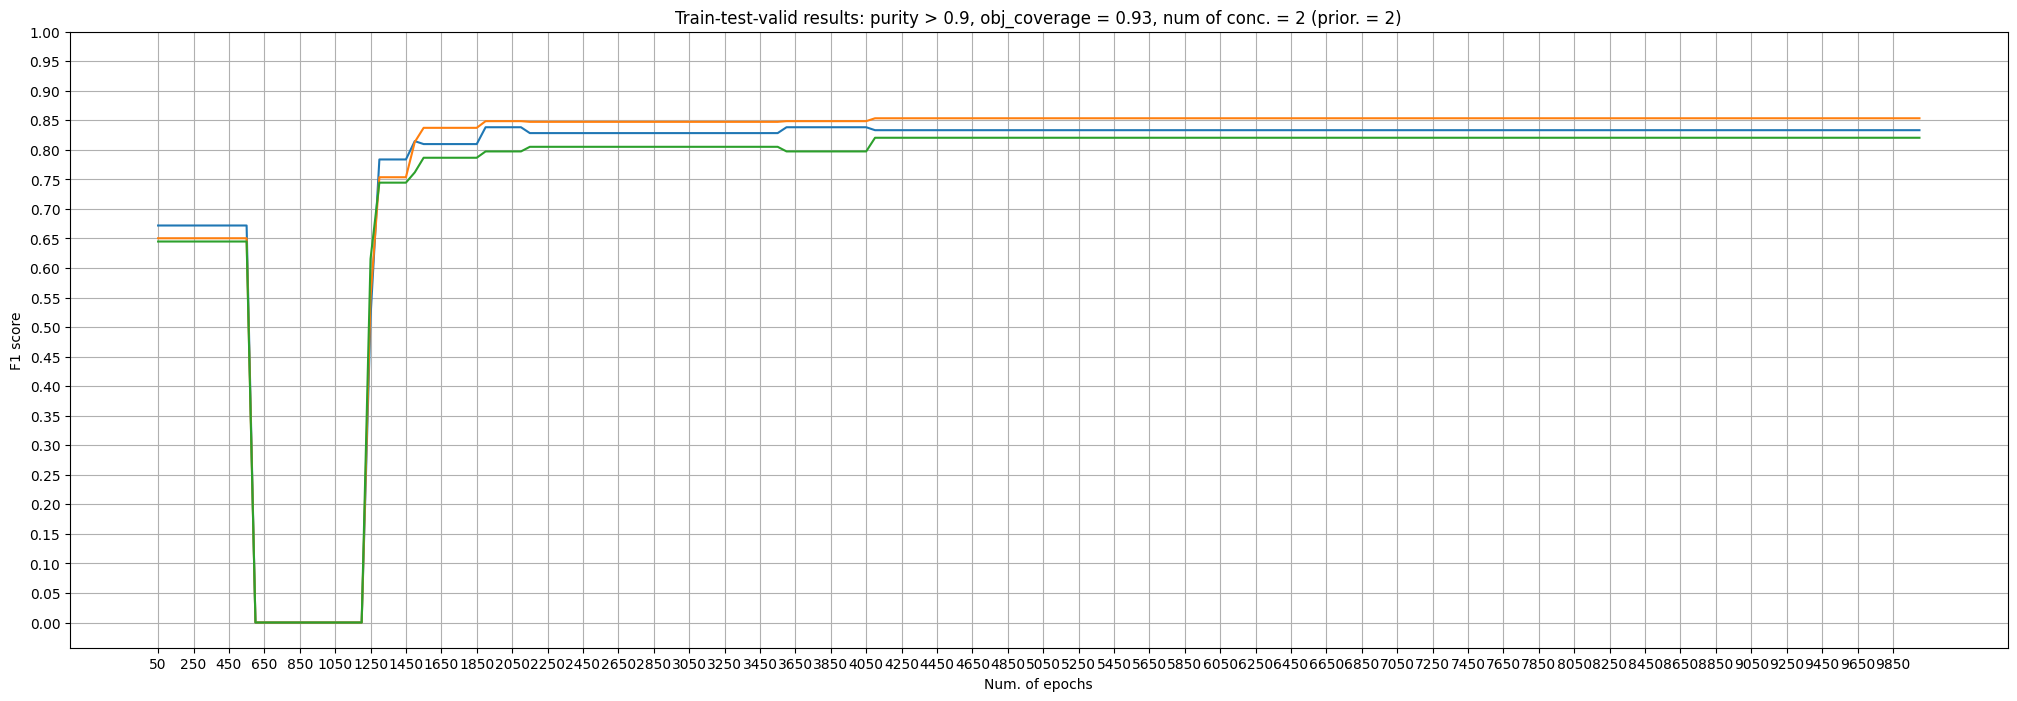

In [428]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,8))
plt.plot(epochs_list_,f1_list_ )
plt.plot(epochs_list_,f1_list_train_)

plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 10050, 200))
plt.yticks(np.arange(0, 1.05, 0.05))

## Test Check

# TESTING !!!!

In [440]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
#f1_list_train = []
#f1_list_valid = []
#epochs_list = []

#res_90_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])
for i in range (0,100):
    print(i)
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_, sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_2, sorted(set(y_train_))) 
   # L_ind_3
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_3, sorted(set(y_train_))) 
    #L_ind_used_prior[10]
    cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[2], sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[23], sorted(set(y_train_)))
    #cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[1], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
    for i in range(36):
        k = 50
        #print('Epoch ', k*(i+1))
        epochs_list.append(k*(i+1))
        if i == 0:
            cn.fit(X_train_, y_train_, k)
        else:
            cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
   # pred_train_all = cn.predict(X_train_)
    #pred_val_all = cn.predict(X_valid)
    #pred_valid = pred_val_all[1]
    pred = pred_all[1]
    #pred_train = pred_train_all[1]
    

   # print('score train:', f1_score(y_train_, pred_train))
    #print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    #f1_list_train.append(f1_score(y_train_, pred_train))
    #f1_list_valid.append(f1_score(y_valid, pred_valid))
    #res_90_all.loc[len(res_90_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

print('Test F1 score', sum(f1_list)/100)


0
score test: 0.8156424581005587
1
score test: 0.8222222222222222
2
score test: 0.8248587570621468
3
score test: 0.8045977011494253
4
score test: 0.819672131147541
5
score test: 0.8383233532934131
6
score test: 0.8314606741573034
7
score test: 0.7954545454545454
8
score test: 0.8313253012048193
9
score test: 0.8383233532934131
10
score test: 0.8383233532934131
11
score test: 0.8156424581005587
12
score test: 0.8156424581005587
13
score test: 0.8383233532934131
14
score test: 0.8383233532934131
15
score test: 0.819672131147541
16
score test: 0.8314606741573034
17
score test: 0.8383233532934131
18
score test: 0.8248587570621468
19
score test: 0.8104575163398693
20
score test: 0.8314606741573034
21
score test: 0.8314606741573034
22
score test: 0.8156424581005587
23
score test: 0.8248587570621468
24
score test: 0.8260869565217391
25
score test: 0.7912087912087912
26
score test: 0.8156424581005587
27
score test: 0.8313253012048193
28
score test: 0.819672131147541
29
score test: 0.8104575163

In [380]:
f1_scores_counts = pd.DataFrame(columns = ['intent', 'object coverage','F1 test'])

In [381]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[0] = [[ L_[14].intent, L_[1].intent, L_[15].intent], full_list_ind[2][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Age>60, Shape>2.5, Margin>1.5), (BI-RADS>4,)...",0.72,0.825


In [391]:
f1_scores_counts.loc[1] = [[L_[12].intent, L_[5].intent, L_[15].intent], full_list_ind[3][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Age>60, Shape>2.5, Margin>1.5), (BI-RADS>4,)...",0.72,0.825
1,"[(Age>60, Margin>1.5), (BI-RADS>4, Shape>2.5),...",0.72,0.817


In [412]:
f1_scores_counts.loc[2] = [[L_[11].intent, L_[6].intent, L_[15].intent], full_list_ind[5][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Age>60, Shape>2.5, Margin>1.5), (BI-RADS>4,)...",0.72,0.825
1,"[(Age>60, Margin>1.5), (BI-RADS>4, Shape>2.5),...",0.72,0.817
2,"[(BI-RADS>4, Age>60, Shape>2.5), (Margin>1.5,)...",0.72,0.821


In [419]:
f1_scores_counts.loc[3] = [[L_[10].intent, L_[7].intent, L_[15].intent], full_list_ind[6][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Age>60, Shape>2.5, Margin>1.5), (BI-RADS>4,)...",0.72,0.825
1,"[(Age>60, Margin>1.5), (BI-RADS>4, Shape>2.5),...",0.72,0.817
2,"[(BI-RADS>4, Age>60, Shape>2.5), (Margin>1.5,)...",0.72,0.821
3,"[(Age>60, Shape>2.5), (BI-RADS>4, Margin>1.5),...",0.72,0.812


In [267]:
f1_scores_counts.drop(4,axis=0,inplace=True)
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Age>60, Shape>2.5, Margin>1.5), (BI-RADS>4,)]",0.72,0.821
1,"[(Age>60, Margin>1.5), (BI-RADS>4, Shape>2.5)]",0.72,0.823
2,"[(BI-RADS>4, Age>60, Shape>2.5), (Margin>1.5,)]",0.72,0.825
3,"[(Age>60, Shape>2.5), (BI-RADS>4, Margin>1.5)]",0.72,0.815


In [280]:
f1_scores_counts.drop(3,axis=0,inplace=True)
# f1_scores_counts

In [233]:
# f1_scores_counts.to_csv('mm80_3.csv')

In [424]:
f1_scores_counts.loc[4] = [[L_[8].intent, L_[3].intent, L_[15].intent], full_list_ind[7][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Age>60, Shape>2.5, Margin>1.5), (BI-RADS>4,)...",0.72,0.825
1,"[(Age>60, Margin>1.5), (BI-RADS>4, Shape>2.5),...",0.72,0.817
2,"[(BI-RADS>4, Age>60, Shape>2.5), (Margin>1.5,)...",0.72,0.821
3,"[(Age>60, Shape>2.5), (BI-RADS>4, Margin>1.5),...",0.72,0.812
4,"[(Shape>2.5, Margin>1.5), (BI-RADS>4, Age>60),...",0.72,0.815


In [282]:
f1_scores_counts.to_csv('mammographic_mass_65_2.csv')

In [431]:
f1_scores_counts.loc[5] = [[L_[4].intent, L_[13].intent, L_[15].intent], full_list_ind[12][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Age>60, Shape>2.5, Margin>1.5), (BI-RADS>4,)...",0.72,0.825
1,"[(Age>60, Margin>1.5), (BI-RADS>4, Shape>2.5),...",0.72,0.817
2,"[(BI-RADS>4, Age>60, Shape>2.5), (Margin>1.5,)...",0.72,0.821
3,"[(Age>60, Shape>2.5), (BI-RADS>4, Margin>1.5),...",0.72,0.812
4,"[(Shape>2.5, Margin>1.5), (BI-RADS>4, Age>60),...",0.72,0.815
5,"[(Shape>2.5,), (BI-RADS>4, Age>60, Margin>1.5)...",0.72,0.815


In [433]:
f1_scores_counts.loc[6] = [[L_[2].intent, L_[9].intent,  L_[15].intent], full_list_ind[14][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(Age>60, Shape>2.5, Margin>1.5), (BI-RADS>4,)...",0.72,0.825
1,"[(Age>60, Margin>1.5), (BI-RADS>4, Shape>2.5),...",0.72,0.817
2,"[(BI-RADS>4, Age>60, Shape>2.5), (Margin>1.5,)...",0.72,0.821
3,"[(Age>60, Shape>2.5), (BI-RADS>4, Margin>1.5),...",0.72,0.812
4,"[(Shape>2.5, Margin>1.5), (BI-RADS>4, Age>60),...",0.72,0.815
5,"[(Shape>2.5,), (BI-RADS>4, Age>60, Margin>1.5)...",0.72,0.815
6,"[(Age>60,), (BI-RADS>4, Shape>2.5, Margin>1.5)...",0.72,0.813


In [434]:
f1_scores_counts.to_csv('mammographic_mass_65_3.csv')

## Test

In [435]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
#f1_list_train = []
#f1_list_valid = []
#epochs_list = []

#res_90_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])
for i in range (0,100):
    print(i)
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_, sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_2, sorted(set(y_train_))) 
   # L_ind_3
   # cn = nl.ConceptNetwork.from_lattice(L_, L_ind_3, sorted(set(y_train_))) 
    #L_ind_used_prior[10]
    cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[1], sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[23], sorted(set(y_train_)))
    #cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[1], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
    for i in range(28):
        k = 50
        #print('Epoch ', k*(i+1))
        epochs_list.append(k*(i+1))
        if i == 0:
            cn.fit(X_train_, y_train_, k)
        else:
            cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
   # pred_train_all = cn.predict(X_train_)
    #pred_val_all = cn.predict(X_valid)
    #pred_valid = pred_val_all[1]
    pred = pred_all[1]
    #pred_train = pred_train_all[1]
    

   # print('score train:', f1_score(y_train_, pred_train))
    #print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    #f1_list_train.append(f1_score(y_train_, pred_train))
    #f1_list_valid.append(f1_score(y_valid, pred_valid))
    #res_90_all.loc[len(res_90_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

print('Test F1 score', sum(f1_list)/100)


0


KeyError: -1

In [253]:
f1_scores_counts = pd.DataFrame(columns = ['intent', 'object coverage','F1 test'])

In [254]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[0] = [[ L_[31].intent, L_[4].intent, L_[40].intent, ], full_list_ind[2][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.843


In [256]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[1] = [[L_[30].intent, L_[4].intent, L_[40].intent], full_list_ind[3][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.843
1,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.837


In [258]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[2] = [[L_[22].intent, L_[4].intent, L_[40].intent], full_list_ind[4][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.843
1,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.837
2,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.838


In [260]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[3] = [[L_[8].intent, L_[40].intent, L_[4].intent], full_list_ind[5][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.843
1,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.837
2,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.838
3,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.836


In [262]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[4] = [[ L_[7].intent, L_[31].intent, L_[4].intent], full_list_ind[6][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.843
1,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.837
2,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.838
3,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.836
4,"[(BI-RADS = 0, BI-RADS = 2, BI-RADS = 3, BI-RA...",0.73,0.847


In [263]:
f1_scores_counts.to_csv('mammographic_mass_70_3.csv')

#### Choosing 3 concepts with maximal union coverage with purity above 0.65 (0.7)

In [371]:
n = 3
pur_ = 0.65
sorted_cov = sorted(cov_conc_one_sided[pur_])

t = count_pur_one_sided[pur_]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_]:
        if c[2] == sorted_cov[-i]:
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen1 = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un1 = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            print(cover_un1)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen1 = conc
    max_cov2 = max_cov
            
            
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen1)

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov2) <=len(max_cov.union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un2 = round(len((max_cov).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un2)
            max_cov2 = max_cov.union(set(conc[0].extent))
            chosen2 = conc
    conc_prior.append(chosen2)
        
        
    list_param.append(conc_prior)
    list_param.append(cover_un2)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un2)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

0.72
0.69
0.71
0.72
0.69
0.71
0.72
0.72
0.68
0.71
0.72
0.65
0.71
0.72
0.65
0.71
0.72
0.69
0.72
0.63
0.69
0.69
0.71
0.72
0.68
0.72
0.6
0.66
0.68
0.71
0.72
0.68
0.69
0.72
0.55
0.66
0.68
0.69
0.69
0.71
0.72
0.55
0.6
0.63
0.65
0.68
0.69
0.72
{1: [0.72, [15, 15, 15]], 2: [0.72, [14, 1, 15]], 3: [0.72, [12, 5, 15]], 4: [0.72, [12, 5, 15]], 5: [0.72, [11, 6, 15]], 6: [0.72, [10, 7, 15]], 7: [0.72, [8, 3, 15]], 8: [0.72, [8, 3, 15]], 9: [0.72, [7, 10, 15]], 10: [0.72, [6, 11, 15]], 11: [0.72, [5, 12, 15]], 12: [0.72, [4, 13, 15]], 13: [0.72, [3, 8, 15]], 14: [0.72, [2, 9, 15]], 15: [0.72, [1, 14, 15]]}
